In [1]:
import cv2
import numpy as np
from os.path import join
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [12.0, 8.0]

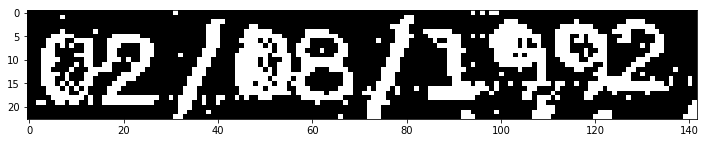

In [2]:
plt.rcParams["figure.figsize"] = [12.0, 8.0]
img_dir = 'date_of_birth_valid'
img_name = '841289701567_0901848920_183788856_1_2016022612243923_0.png'
# img = cv2.imread(join(img_dir, img_name), 0)
img = cv2.imread('841289701567_0902424581_381650553_1_2015081512245256_0.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

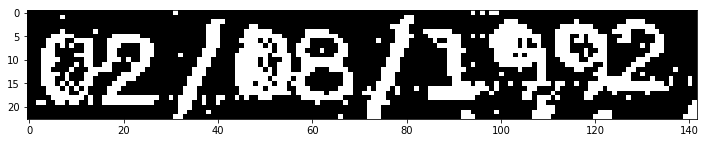

In [3]:
# kernel_size = 2
# kernel = np.ones((kernel_size, kernel_size),np.uint8)
# img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
_, thresh = cv2.threshold(img, 127, 255, 0)
plt.imshow(thresh, cmap='gray')
plt.show()

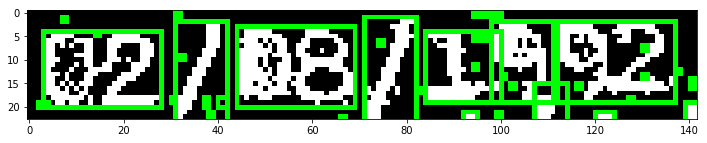

In [4]:
_, contours, _ = cv2.findContours(thresh, mode=cv2.RETR_EXTERNAL, method=2)
thresh_coloured = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

num_contours = len(contours)
contour_areas = [0] * num_contours
heights = [0] * num_contours
img_height = thresh_coloured.shape[0]

for i in range(0, num_contours):
    x,y,w,h = cv2.boundingRect(contours[i])
    heights[i] = h
    cv2.rectangle(thresh_coloured, (x, y),(x + w, y + h), (0, 255, 0), 1)
plt.imshow(thresh_coloured, cmap = 'gray')
plt.show()

71
31
112
44
98
3
84
107
[[  3   4  25  16]
 [ 31   2  11  21]
 [ 44   3  25  17]
 [ 71   1  11  22]
 [ 84   4  16  15]
 [ 98   2  13  17]
 [107  15   7   8]
 [112   2  25  17]]
3
137
1
23


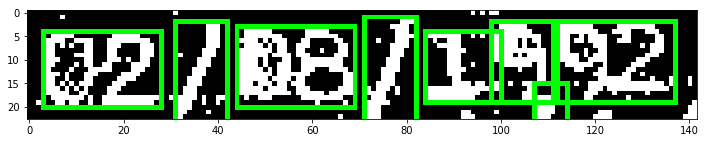

In [5]:
# desc_cnt_idx = np.flipud(np.argsort(np.array(contour_areas)))
desc_cnt_idx = np.flipud(np.argsort(np.array(heights)))

# print(len(desc_cnt_idx))
thresh_coloured = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

# Heuristic
if num_contours < 8:
    max_num_contours = num_contours
else:
    max_num_contours = 8
# max_num_contours = 8

horizontal_top_lefts = [0] * max_num_contours
rects = [None] * max_num_contours
digit_contours = np.array(contours)[desc_cnt_idx[0:max_num_contours]]
# print(digit_contours.shape)
# print(rects)

for i in range(max_num_contours):
    x,y,w,h = cv2.boundingRect(digit_contours[i])
    rects[i] = (x, y, w, h)
    print(rects[i][0])
    horizontal_top_lefts[i] = x
    cv2.rectangle(thresh_coloured, (x, y),(x + w, y + h), (0, 255, 0), 1)
plt.imshow(thresh_coloured, cmap = 'gray')

asc_countour_idx = np.argsort(np.array(horizontal_top_lefts))
rect_nparray = np.array(rects)
print(rect_nparray[asc_countour_idx][:,:])
start_col = rect_nparray[asc_countour_idx][0, 0]
print(start_col)
end_col = rect_nparray[asc_countour_idx][max_num_contours - 1, 0] + rect_nparray[asc_countour_idx][max_num_contours - 1, 2]
print(end_col)
start_row = np.min(rect_nparray[:, 1])
print(start_row)
end_row = np.max(rect_nparray[:, 1] + rect_nparray[:, 3])
print(end_row)

(22, 134)


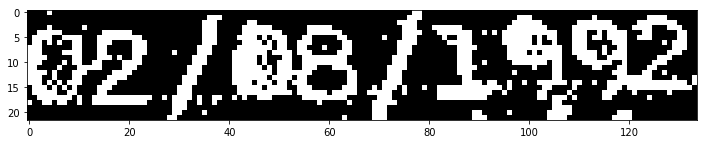

In [6]:
plt.rcParams["figure.figsize"] = [12.0, 8.0]
cropped_img = img[start_row:end_row, start_col:end_col]
plt.imshow(cropped_img, cmap = 'gray')
print(cropped_img.shape)
dd_end = 0.22
mm_start = 0.29
mm_end = 0.51
yyyy_start = 0.56
img_w = cropped_img.shape[1]

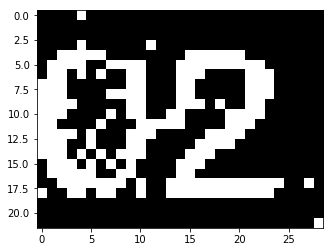

In [7]:
plt.rcParams["figure.figsize"] = [6.0, 4.0]
plt.imshow(cropped_img[:, :int(img_w * dd_end)], cmap = 'gray')

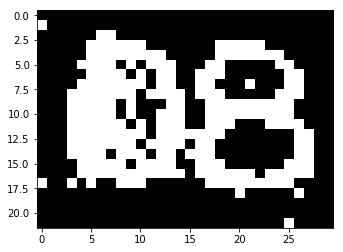

In [8]:
plt.rcParams["figure.figsize"] = [6.0, 4.0]
plt.imshow(cropped_img[:, int(img_w * mm_start):int(img_w * mm_end)], cmap = 'gray')

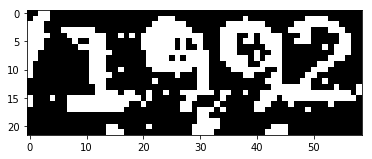

In [9]:
plt.rcParams["figure.figsize"] = [6.0, 4.0]
plt.imshow(cropped_img[:, int(img_w * yyyy_start):], cmap = 'gray')

In [10]:
import cv2
from os.path import join
from os import listdir
from recognise_dob import crop_dob

input_dir = 'date_of_birth_valid'
output_dir = 'date_of_birth_valid_RESULT'

input_file = listdir(input_dir)
for file in input_file:
    out_dd, out_mm, out_yyyy = crop_dob(cv2.imread(join(input_dir, file), 0))
    cv2.imwrite(join(output_dir, 'dd', file), out_dd)
    cv2.imwrite(join(output_dir, 'mm', file), out_mm)
    cv2.imwrite(join(output_dir, 'yyyy', file), out_yyyy)